In [140]:
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras import layers
import keras

In [141]:
df = pd.read_csv('./processed.cleveland.data')

In [142]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [179]:
# Drop ? in CA columns
df = df[(df.ca != '?') & (df.thal != '?')]

In [181]:
df['bin_target'] = df.target != 0

In [182]:
df.bin_target.value_counts()

False    160
True     137
Name: bin_target, dtype: int64

In [183]:
df.shape

(297, 15)

In [184]:
df.isna().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
bin_target    0
dtype: int64

In [185]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
sex,297.0,0.676768,0.468500,0.0,0.0,1.0,1.0,1.0
cp,297.0,3.158249,0.964859,1.0,3.0,3.0,4.0,4.0
trestbps,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
fbs,297.0,0.144781,0.352474,0.0,0.0,0.0,0.0,1.0
restecg,297.0,0.996633,0.994914,0.0,0.0,1.0,2.0,2.0
thalach,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
exang,297.0,0.326599,0.469761,0.0,0.0,0.0,1.0,1.0
oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2


In [186]:
df.sex.value_counts()

1.0    201
0.0     96
Name: sex, dtype: int64

In [187]:
df.cp.value_counts()

4.0    142
3.0     83
2.0     49
1.0     23
Name: cp, dtype: int64

/Users/rajtilakindrajit/.virtualenvs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


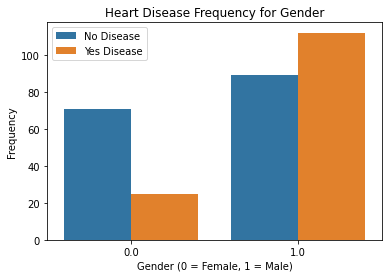

In [188]:
sns.countplot('sex', hue='bin_target', data=df)
plt.title('Heart Disease Frequency for Gender')
plt.legend(['No Disease', 'Yes Disease'])

plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Frequency')
plt.show()

/Users/rajtilakindrajit/.virtualenvs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


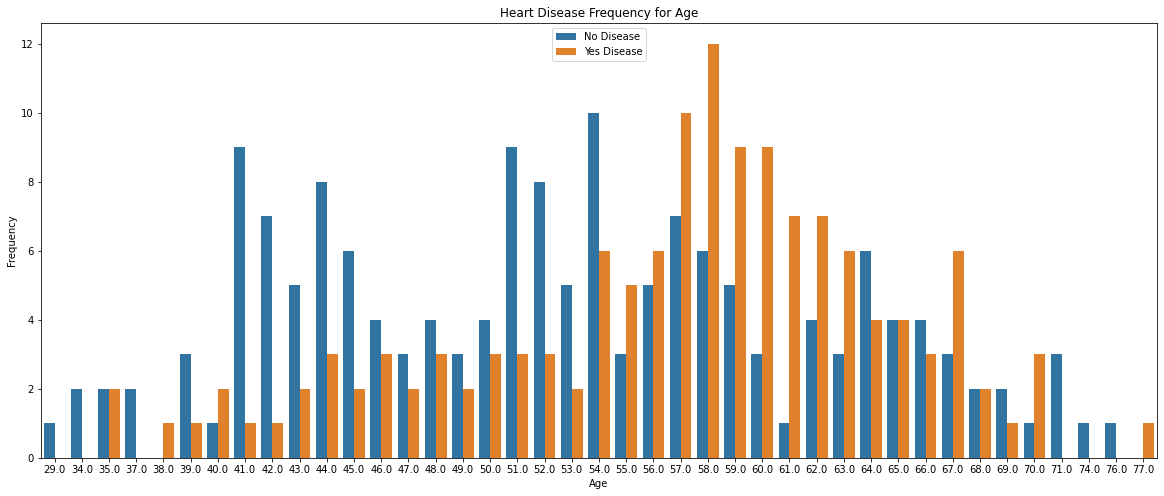

In [189]:
plt.figure(figsize=(20, 8))
sns.countplot('age', hue='bin_target', data=df,)
plt.title('Heart Disease Frequency for Age')
plt.legend(['No Disease', 'Yes Disease'])

plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

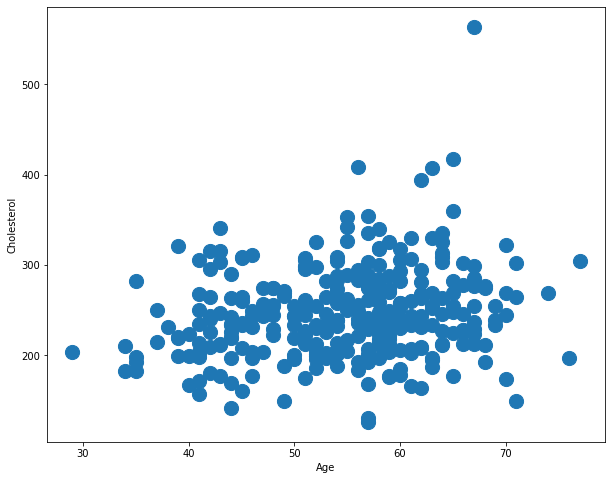

In [190]:
plt.figure(figsize=(10, 8))
plt.scatter(df.age, df.chol, s=200)
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()

In [191]:
features = df.drop(['target', 'bin_target'], axis=1)
target = df['bin_target'].astype(float)

In [192]:
features.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
83,68.0,1.0,3.0,180.0,274.0,1.0,2.0,150.0,1.0,1.6,2.0,0.0,7.0
164,48.0,1.0,3.0,124.0,255.0,1.0,0.0,175.0,0.0,0.0,1.0,2.0,3.0
226,47.0,1.0,4.0,112.0,204.0,0.0,0.0,143.0,0.0,0.1,1.0,0.0,3.0
295,41.0,1.0,2.0,120.0,157.0,0.0,0.0,182.0,0.0,0.0,1.0,0.0,3.0
197,45.0,0.0,4.0,138.0,236.0,0.0,2.0,152.0,1.0,0.2,2.0,0.0,3.0


In [193]:
target.sample(5)

18     0.0
97     1.0
81     0.0
157    1.0
51     0.0
Name: bin_target, dtype: float64

In [194]:
# Extract and convert/encode categorical features
categorical_features = features[['sex', 'fbs', 'exang', 'cp', 'ca', 'slope', 'thal', 'restecg']].copy()
categorical_features.head()

,sex,fbs,exang,cp,ca,slope,thal,restecg
0,1.0,1.0,0.0,1.0,0.0,3.0,6.0,2.0
1,1.0,0.0,1.0,4.0,3.0,2.0,3.0,2.0
2,1.0,0.0,1.0,4.0,2.0,2.0,7.0,2.0
3,1.0,0.0,0.0,3.0,0.0,3.0,3.0,0.0
4,0.0,0.0,0.0,2.0,0.0,1.0,3.0,2.0


In [195]:
# Extract numeric features
numeric_features = features[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].copy()
numeric_features.head()

,age,trestbps,chol,thalach,oldpeak
0,63.0,145.0,233.0,150.0,2.3
1,67.0,160.0,286.0,108.0,1.5
2,67.0,120.0,229.0,129.0,2.6
3,37.0,130.0,250.0,187.0,3.5
4,41.0,130.0,204.0,172.0,1.4


In [196]:
# Standardize the numeric features
ss = StandardScaler()
numeric_features = pd.DataFrame(ss.fit_transform(numeric_features), columns=numeric_features.columns, index=numeric_features.index)

In [197]:
numeric_features.describe()

,age,trestbps,chol,thalach,oldpeak
count,2.970000e+02,2.970000e+02,2.970000e+02,2.970000e+02,297.000000
mean,-1.226105e-16,4.904420e-16,-1.958777e-16,4.784800e-16,0.000000
std,1.001688e+00,1.001688e+00,1.001688e+00,1.001688e+00,1.001688
min,-2.827176e+00,-2.125634e+00,-2.337704e+00,-3.431849e+00,-0.906712
25%,-7.241238e-01,-6.594306e-01,-7.002541e-01,-7.247694e-01,-0.906712
50%,1.613719e-01,-9.550637e-02,-8.380217e-02,1.484822e-01,-0.219520
75%,7.148067e-01,4.684179e-01,5.519138e-01,7.160957e-01,0.467672
max,2.485798e+00,3.851964e+00,6.099981e+00,2.287949e+00,4.419026


In [198]:
processed_features = pd.concat([numeric_features, categorical_features], axis=1, sort=False)
processed_features.head()

,age,trestbps,chol,thalach,oldpeak,sex,fbs,exang,cp,ca,slope,thal,restecg
0,0.936181,0.750380,-0.276443,0.017494,1.068965,1.0,1.0,0.0,1.0,0.0,3.0,6.0,2.0
1,1.378929,1.596266,0.744555,-1.816334,0.381773,1.0,0.0,1.0,4.0,3.0,2.0,3.0,2.0
2,1.378929,-0.659431,-0.353500,-0.899420,1.326662,1.0,0.0,1.0,4.0,2.0,2.0,7.0,2.0
3,-1.941680,-0.095506,0.051047,1.633010,2.099753,1.0,0.0,0.0,3.0,0.0,3.0,3.0,0.0
4,-1.498933,-0.095506,-0.835103,0.978071,0.295874,0.0,0.0,0.0,2.0,0.0,1.0,3.0,2.0


In [199]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(processed_features, target, test_size=0.2, random_state=123)

In [200]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=1234)

In [201]:
x_train.shape, x_val.shape, x_test.shape

((201, 13), (36, 13), (60, 13))

In [234]:
x_train = x_train.iloc[1:]
y_train = y_train.iloc[1:]
x_train.shape, y_train.shape

((200, 13), (200,))

In [240]:
def build_model():
    
    # Define the layers
    inputs = tf.keras.Input(shape=(x_train.shape[1], ))
    dense_layer1 = layers.Dense(12, activation='relu')
    dropout_layer = layers.Dropout(0.3)
    dense_layer2 = layers.Dense(8, activation='relu')
    predict_layer = layers.Dense(1, activation='sigmoid')
    

    # Wire the model
    x = dense_layer1(inputs)
    x = dropout_layer(x)
    x = dense_layer2(x)
    preditions = predict_layer(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=preditions)
    model.summary()
    
    model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=tf.keras.losses.BinaryCrossentropy(), 
                 metrics=['accuracy', tf.keras.metrics.Precision(0.5), tf.keras.metrics.Recall(0.5)])
    return model
    

In [241]:
model = build_model()

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_18 (Dense)             (None, 12)                168       
_________________________________________________________________
dropout_6 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 9         
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


In [242]:
keras.utils.plot_model(model)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [243]:
x_train.describe()

,age,trestbps,chol,thalach,oldpeak,sex,fbs,exang,cp,slope,restecg
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.051792,0.049704,-0.005205,-0.012633,-0.030971,0.665000,0.135000,0.300000,3.175000,1.615000,1.030000
std,0.995966,0.978322,0.979228,1.065242,0.944033,0.473175,0.342581,0.459408,0.963857,0.607139,0.997031
min,-2.827176,-2.125634,-2.337704,-3.431849,-0.906712,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,-0.613437,-0.659431,-0.690622,-0.768432,-0.906712,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000
50%,0.161372,-0.095506,-0.083802,0.192145,-0.219520,1.000000,0.000000,0.000000,3.000000,2.000000,2.000000
75%,0.825494,0.468418,0.571178,0.770674,0.467672,1.000000,0.000000,1.000000,4.000000,2.000000,2.000000
max,2.485798,3.400824,3.268155,2.287949,3.903632,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000


In [244]:
dataset_train = tf.data.Dataset.from_tensor_slices(
    (x_train.values.astype(np.float32), y_train.values.astype(np.float32)))

dataset_train = dataset_train.batch(20)
dataset_train.shuffle(128)

<ShuffleDataset shapes: ((None, 13), (None,)), types: (tf.float32, tf.float32)>

In [245]:
num_epochs = 100

In [246]:
dataset_val = tf.data.Dataset.from_tensor_slices(
    (x_val.values.astype(np.float32), y_val.values.astype(np.float32)))

dataset_val = dataset_train.batch(18)

In [247]:
training_history = model.fit(dataset_train, epochs=num_epochs, validation_data=dataset_val)

Epoch 1/100
10/10 [==============================] - 0s 29ms/step - loss: 0.7932 - accuracy: 0.5050 - precision_6: 0.4886 - recall_6: 0.9053 - val_loss: 0.7185 - val_accuracy: 0.4950 - val_precision_6: 0.4844 - val_recall_6: 0.9789
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6987 - accuracy: 0.5450 - precision_6: 0.5133 - recall_6: 0.8105 - val_loss: 0.6690 - val_accuracy: 0.5100 - val_precision_6: 0.4917 - val_recall_6: 0.9368
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7061 - accuracy: 0.5800 - precision_6: 0.5414 - recall_6: 0.7579 - val_loss: 0.6406 - val_accuracy: 0.6050 - val_precision_6: 0.5506 - val_recall_6: 0.9158
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6685 - accuracy: 0.6000 - precision_6: 0.5652 - recall_6: 0.6842 - val_loss: 0.6219 - val_accuracy: 0.6100 - val_precision_6: 0.5603 - val_recall_6: 0.8316
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.

Epoch 35/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5319 - accuracy: 0.7450 - precision_6: 0.7500 - recall_6: 0.6947 - val_loss: 0.4607 - val_accuracy: 0.7900 - val_precision_6: 0.7624 - val_recall_6: 0.8105
Epoch 36/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5210 - accuracy: 0.7200 - precision_6: 0.7053 - recall_6: 0.7053 - val_loss: 0.4582 - val_accuracy: 0.7900 - val_precision_6: 0.7624 - val_recall_6: 0.8105
Epoch 37/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4924 - accuracy: 0.7650 - precision_6: 0.7500 - recall_6: 0.7579 - val_loss: 0.4555 - val_accuracy: 0.7950 - val_precision_6: 0.7700 - val_recall_6: 0.8105
Epoch 38/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5464 - accuracy: 0.7150 - precision_6: 0.7111 - recall_6: 0.6737 - val_loss: 0.4530 - val_accuracy: 0.8000 - val_precision_6: 0.7778 - val_recall_6: 0.8105
Epoch 39/100
10/10 [==============================] - 0s 2ms/step - loss

10/10 [==============================] - 0s 2ms/step - loss: 0.4526 - accuracy: 0.7700 - precision_6: 0.7634 - recall_6: 0.7474 - val_loss: 0.4010 - val_accuracy: 0.8150 - val_precision_6: 0.8021 - val_recall_6: 0.8105
Epoch 71/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4537 - accuracy: 0.8000 - precision_6: 0.8313 - recall_6: 0.7263 - val_loss: 0.3998 - val_accuracy: 0.8150 - val_precision_6: 0.8021 - val_recall_6: 0.8105
Epoch 72/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4533 - accuracy: 0.7850 - precision_6: 0.7826 - recall_6: 0.7579 - val_loss: 0.3988 - val_accuracy: 0.8150 - val_precision_6: 0.8021 - val_recall_6: 0.8105
Epoch 73/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4406 - accuracy: 0.8000 - precision_6: 0.8161 - recall_6: 0.7474 - val_loss: 0.3974 - val_accuracy: 0.8150 - val_precision_6: 0.8021 - val_recall_6: 0.8105
Epoch 74/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4583 - ac

In [249]:
# view what metrics have been tracked
training_history.history.keys()

dict_keys(['loss', 'accuracy', 'precision_6', 'recall_6', 'val_loss', 'val_accuracy', 'val_precision_6', 'val_recall_6'])

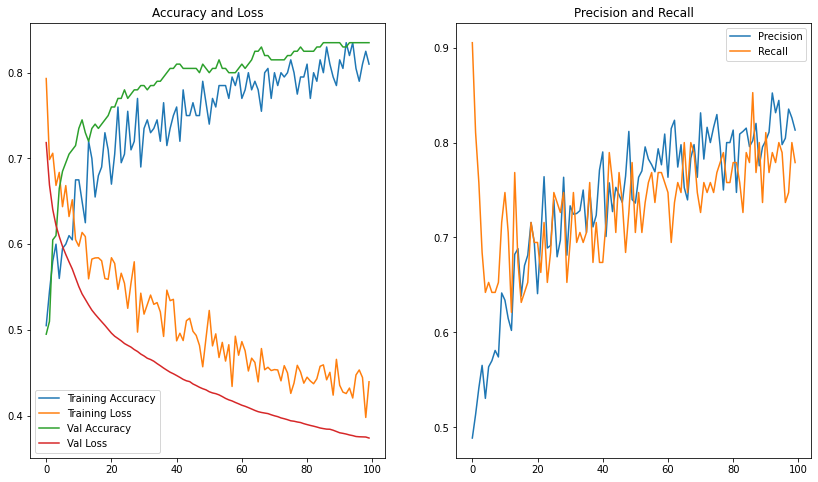

In [251]:
# Display training details
th = training_history
train_acc = th.history['accuracy']
train_loss = th.history['loss']
val_acc = th.history['val_accuracy']
val_loss = th.history['val_loss']

prec = th.history['precision_6']
recall = th.history['recall_6']

ep = range(num_epochs)

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)

plt.plot(ep, train_acc, label='Training Accuracy')
plt.plot(ep, train_loss, label='Training Loss')
plt.plot(ep, val_acc, label='Val Accuracy')
plt.plot(ep, val_loss, label='Val Loss')

plt.title('Accuracy and Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(ep, prec, label='Precision')
plt.plot(ep, recall, label='Recall')
plt.title('Precision and Recall')
plt.legend()

In [255]:
score = model.evaluate(x_test.astype(np.float32), y_test.astype(np.float32))
score_df = pd.Series(score, index=['loss', 'accuracy', 'precision', 'recall'])
score_df

2/2 [==============================] - 0s 1ms/step - loss: 0.4689 - accuracy: 0.8000 - precision_6: 0.7586 - recall_6: 0.8148


loss         0.468901
accuracy     0.800000
precision    0.758621
recall       0.814815
dtype: float64

In [260]:
y_pred = model.predict(x_test.astype(np.float32))
y_pred[:5]

array([[0.23983592],
       [0.99028516],
       [0.53109634],
       [0.3197353 ],
       [0.13747302]], dtype=float32)

In [261]:
y_pred = np.where(y_pred>=0.5, 1, y_pred)
y_pred = np.where(y_pred<0.5, 0, y_pred)
y_pred[:5]

array([[0.],
       [1.],
       [1.],
       [0.],
       [0.]], dtype=float32)

In [266]:
pred_results = pd.DataFrame({'y_test': y_test.values.flatten(), 
                             'y_pred': y_pred.flatten().astype('int32')}, 
                             index=range(len(y_pred)))
pred_results.sample(10)

,y_test,y_pred
38,1.0,1
12,1.0,1
45,0.0,0
53,0.0,1
57,1.0,1
17,0.0,0
28,1.0,1
25,1.0,1
19,0.0,0
52,1.0,1


In [267]:
# Confusion matrix
pd.crosstab(pred_results.y_pred, pred_results.y_test)

y_test,0.0,1.0
y_pred,,
0,26,5
1,7,22


In [270]:
# Model Subclassing
from sklearn import datasets

In [273]:
wine = datasets.load_wine()

In [275]:
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [276]:
data = pd.DataFrame(data=wine['data'], columns=wine['feature_names'])
data['target'] = wine['target']
data.sample(4)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
31,13.58,1.66,2.36,19.1,106.0,2.86,3.19,0.22,1.95,6.90,1.09,2.88,1515.0,0
98,12.37,1.07,2.10,18.5,88.0,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660.0,1
63,12.37,1.13,2.16,19.0,87.0,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420.0,1
151,12.79,2.67,2.48,22.0,112.0,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480.0,2


In [277]:
data.shape

(178, 14)

In [278]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [281]:
data.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [282]:
data['target'].value_counts(())

1    71
0    59
2    48
Name: target, dtype: int64

/Users/rajtilakindrajit/.virtualenvs/tf/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='alcohol', ylabel='Density'>

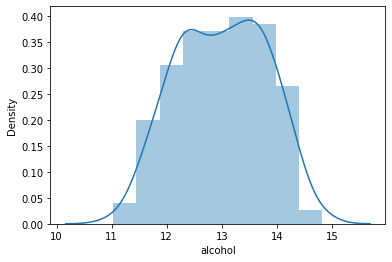

In [286]:
sns.distplot(data['alcohol'])

/Users/rajtilakindrajit/.virtualenvs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


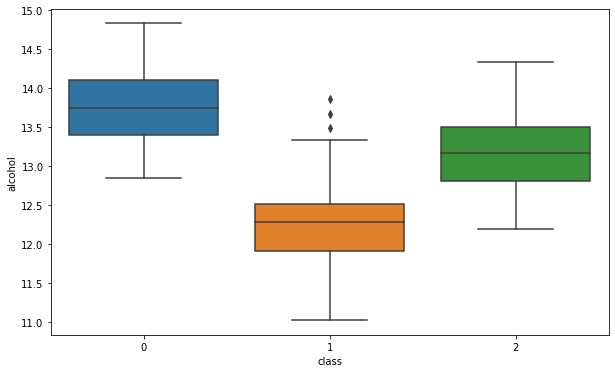

In [287]:
plt.figure(figsize=(10, 6))
sns.boxplot('target', 'alcohol', data=data)
plt.xlabel('class')
plt.ylabel('alcohol')
plt.show()

In [288]:
features = data.drop('target', axis=1)
target = data.target

In [289]:
features.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [290]:
target.sample(5)

139    2
69     1
129    1
140    2
104    1
Name: target, dtype: int64

In [293]:
target = keras.utils.to_categorical(target, 3)
target

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [294]:
ss = StandardScaler()
processed_features = pd.DataFrame(ss.fit_transform(features), columns=features.columns, index=features.index)
processed_features.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,7.943708e-15,1.002821,-2.434235,-0.788245,0.061000,0.836129,2.259772
malic_acid,178.0,3.592632e-16,1.002821,-1.432983,-0.658749,-0.423112,0.669793,3.109192
ash,178.0,-4.066660e-15,1.002821,-3.679162,-0.572122,-0.023821,0.698109,3.156325
alcalinity_of_ash,178.0,-7.983626e-17,1.002821,-2.671018,-0.689137,0.001518,0.602088,3.154511
magnesium,178.0,-7.983626e-17,1.002821,-2.088255,-0.824415,-0.122282,0.509638,4.371372
total_phenols,178.0,-3.991813e-17,1.002821,-2.107246,-0.885468,0.095960,0.808997,2.539515
flavanoids,178.0,9.979533e-16,1.002821,-1.695971,-0.827539,0.106150,0.849085,3.062832
nonflavanoid_phenols,178.0,-5.588538e-16,1.002821,-1.868234,-0.740141,-0.176095,0.609541,2.402403
proanthocyanins,178.0,-1.656602e-15,1.002821,-2.069034,-0.597284,-0.062898,0.629175,3.485073
color_intensity,178.0,-3.442939e-16,1.002821,-1.634288,-0.795103,-0.159225,0.493956,3.435432


In [316]:
x_train, x_test, y_train, y_test = train_test_split(processed_features, target, test_size=0.2, random_state=12)

In [317]:
x_train.shape, y_train.shape

((142, 13), (142, 3))

In [318]:
from keras.models import Model
from keras import layers

class WineClassificationModel(Model):
    def __init__(self, input_shape):
        super(WineClassificationModel, self).__init__()
        self.d1 = layers.Dense(128, activation='relu', input_shape=[input_shape])
        self.d2 = layers.Dense(128, activation='relu', )
        self.d3 = layers.Dense(3, activation='softmax', )
    
    def call(self, x):
        x = self.d1(x)
        x = self.d2(x)
        x = self.d3(x)
        return x

In [319]:
model = WineClassificationModel(x_train.shape[1])

model.compile(optimizer=keras.optimizers.SGD(lr=0.001), 
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=['accuracy'])

In [320]:
epochs = 500

In [321]:
training_history = model.fit(x_train, y_train, validation_split=0.2, epochs=epochs, batch_size=64)

Epoch 1/500

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

2/2 [==============================] - 0s 58ms/step - loss: 1.0517 - accuracy: 0.4248 - val_loss: 0.9264 - val_accuracy: 0.5517
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 1.0484 - accuracy: 0.4248 - val_loss: 0.9242 - val_accuracy: 0.5517
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 1.0452 - accuracy: 0.4336 - val_loss: 0.9219 - val_accuracy: 0.5517
Epoch 4/500
2/2 [==============================] - 0s 9ms/step - loss: 1.0420 - accuracy: 

2/2 [==============================] - 0s 9ms/step - loss: 0.9009 - accuracy: 0.6814 - val_loss: 0.8195 - val_accuracy: 0.7931
Epoch 55/500
2/2 [==============================] - 0s 10ms/step - loss: 0.8984 - accuracy: 0.6814 - val_loss: 0.8177 - val_accuracy: 0.7931
Epoch 56/500
2/2 [==============================] - 0s 10ms/step - loss: 0.8960 - accuracy: 0.6814 - val_loss: 0.8159 - val_accuracy: 0.7931
Epoch 57/500
2/2 [==============================] - 0s 9ms/step - loss: 0.8935 - accuracy: 0.6814 - val_loss: 0.8141 - val_accuracy: 0.7931
Epoch 58/500
2/2 [==============================] - 0s 10ms/step - loss: 0.8910 - accuracy: 0.6903 - val_loss: 0.8124 - val_accuracy: 0.7931
Epoch 59/500
2/2 [==============================] - 0s 9ms/step - loss: 0.8886 - accuracy: 0.7080 - val_loss: 0.8106 - val_accuracy: 0.8276
Epoch 60/500
2/2 [==============================] - 0s 10ms/step - loss: 0.8863 - accuracy: 0.7168 - val_loss: 0.8089 - val_accuracy: 0.8276
Epoch 61/500
2/2 [===========

2/2 [==============================] - 0s 10ms/step - loss: 0.7744 - accuracy: 0.8850 - val_loss: 0.7270 - val_accuracy: 0.8966
Epoch 113/500
2/2 [==============================] - 0s 9ms/step - loss: 0.7724 - accuracy: 0.8850 - val_loss: 0.7255 - val_accuracy: 0.8966
Epoch 114/500
2/2 [==============================] - 0s 9ms/step - loss: 0.7705 - accuracy: 0.8850 - val_loss: 0.7241 - val_accuracy: 0.8966
Epoch 115/500
2/2 [==============================] - 0s 10ms/step - loss: 0.7686 - accuracy: 0.8850 - val_loss: 0.7226 - val_accuracy: 0.8966
Epoch 116/500
2/2 [==============================] - 0s 10ms/step - loss: 0.7666 - accuracy: 0.8850 - val_loss: 0.7211 - val_accuracy: 0.9310
Epoch 117/500
2/2 [==============================] - 0s 9ms/step - loss: 0.7648 - accuracy: 0.8850 - val_loss: 0.7197 - val_accuracy: 0.9310
Epoch 118/500
2/2 [==============================] - 0s 10ms/step - loss: 0.7628 - accuracy: 0.8850 - val_loss: 0.7183 - val_accuracy: 0.9310
Epoch 119/500
2/2 [====

Epoch 170/500
2/2 [==============================] - 0s 9ms/step - loss: 0.6716 - accuracy: 0.9381 - val_loss: 0.6485 - val_accuracy: 0.9655
Epoch 171/500
2/2 [==============================] - 0s 10ms/step - loss: 0.6700 - accuracy: 0.9381 - val_loss: 0.6472 - val_accuracy: 0.9655
Epoch 172/500
2/2 [==============================] - 0s 9ms/step - loss: 0.6684 - accuracy: 0.9381 - val_loss: 0.6460 - val_accuracy: 0.9655
Epoch 173/500
2/2 [==============================] - 0s 10ms/step - loss: 0.6667 - accuracy: 0.9381 - val_loss: 0.6447 - val_accuracy: 1.0000
Epoch 174/500
2/2 [==============================] - 0s 9ms/step - loss: 0.6652 - accuracy: 0.9381 - val_loss: 0.6435 - val_accuracy: 1.0000
Epoch 175/500
2/2 [==============================] - 0s 9ms/step - loss: 0.6636 - accuracy: 0.9381 - val_loss: 0.6422 - val_accuracy: 1.0000
Epoch 176/500
2/2 [==============================] - 0s 9ms/step - loss: 0.6620 - accuracy: 0.9381 - val_loss: 0.6410 - val_accuracy: 1.0000
Epoch 177/5

Epoch 228/500
2/2 [==============================] - 0s 10ms/step - loss: 0.5858 - accuracy: 0.9646 - val_loss: 0.5805 - val_accuracy: 1.0000
Epoch 229/500
2/2 [==============================] - 0s 9ms/step - loss: 0.5844 - accuracy: 0.9646 - val_loss: 0.5793 - val_accuracy: 1.0000
Epoch 230/500
2/2 [==============================] - 0s 9ms/step - loss: 0.5831 - accuracy: 0.9646 - val_loss: 0.5783 - val_accuracy: 1.0000
Epoch 231/500
2/2 [==============================] - 0s 10ms/step - loss: 0.5817 - accuracy: 0.9646 - val_loss: 0.5772 - val_accuracy: 1.0000
Epoch 232/500
2/2 [==============================] - 0s 10ms/step - loss: 0.5804 - accuracy: 0.9646 - val_loss: 0.5761 - val_accuracy: 1.0000
Epoch 233/500
2/2 [==============================] - 0s 9ms/step - loss: 0.5791 - accuracy: 0.9646 - val_loss: 0.5750 - val_accuracy: 1.0000
Epoch 234/500
2/2 [==============================] - 0s 10ms/step - loss: 0.5777 - accuracy: 0.9646 - val_loss: 0.5739 - val_accuracy: 1.0000
Epoch 235

Epoch 286/500
2/2 [==============================] - 0s 10ms/step - loss: 0.5137 - accuracy: 0.9646 - val_loss: 0.5219 - val_accuracy: 1.0000
Epoch 287/500
2/2 [==============================] - 0s 10ms/step - loss: 0.5126 - accuracy: 0.9646 - val_loss: 0.5209 - val_accuracy: 1.0000
Epoch 288/500
2/2 [==============================] - 0s 10ms/step - loss: 0.5115 - accuracy: 0.9646 - val_loss: 0.5200 - val_accuracy: 1.0000
Epoch 289/500
2/2 [==============================] - 0s 9ms/step - loss: 0.5103 - accuracy: 0.9646 - val_loss: 0.5190 - val_accuracy: 1.0000
Epoch 290/500
2/2 [==============================] - 0s 9ms/step - loss: 0.5092 - accuracy: 0.9646 - val_loss: 0.5181 - val_accuracy: 1.0000
Epoch 291/500
2/2 [==============================] - 0s 10ms/step - loss: 0.5081 - accuracy: 0.9646 - val_loss: 0.5172 - val_accuracy: 1.0000
Epoch 292/500
2/2 [==============================] - 0s 9ms/step - loss: 0.5070 - accuracy: 0.9646 - val_loss: 0.5162 - val_accuracy: 1.0000
Epoch 293

Epoch 344/500
2/2 [==============================] - 0s 9ms/step - loss: 0.4533 - accuracy: 0.9823 - val_loss: 0.4716 - val_accuracy: 1.0000
Epoch 345/500
2/2 [==============================] - 0s 9ms/step - loss: 0.4523 - accuracy: 0.9823 - val_loss: 0.4708 - val_accuracy: 1.0000
Epoch 346/500
2/2 [==============================] - 0s 9ms/step - loss: 0.4514 - accuracy: 0.9823 - val_loss: 0.4700 - val_accuracy: 1.0000
Epoch 347/500
2/2 [==============================] - 0s 9ms/step - loss: 0.4505 - accuracy: 0.9823 - val_loss: 0.4693 - val_accuracy: 1.0000
Epoch 348/500
2/2 [==============================] - 0s 9ms/step - loss: 0.4495 - accuracy: 0.9823 - val_loss: 0.4685 - val_accuracy: 1.0000
Epoch 349/500
2/2 [==============================] - 0s 9ms/step - loss: 0.4486 - accuracy: 0.9823 - val_loss: 0.4677 - val_accuracy: 1.0000
Epoch 350/500
2/2 [==============================] - 0s 10ms/step - loss: 0.4476 - accuracy: 0.9823 - val_loss: 0.4669 - val_accuracy: 1.0000
Epoch 351/50

Epoch 402/500
2/2 [==============================] - 0s 11ms/step - loss: 0.4022 - accuracy: 0.9912 - val_loss: 0.4281 - val_accuracy: 1.0000
Epoch 403/500
2/2 [==============================] - 0s 10ms/step - loss: 0.4014 - accuracy: 0.9912 - val_loss: 0.4273 - val_accuracy: 1.0000
Epoch 404/500
2/2 [==============================] - 0s 11ms/step - loss: 0.4006 - accuracy: 0.9912 - val_loss: 0.4267 - val_accuracy: 1.0000
Epoch 405/500
2/2 [==============================] - 0s 11ms/step - loss: 0.3998 - accuracy: 0.9912 - val_loss: 0.4260 - val_accuracy: 1.0000
Epoch 406/500
2/2 [==============================] - 0s 10ms/step - loss: 0.3990 - accuracy: 0.9912 - val_loss: 0.4253 - val_accuracy: 1.0000
Epoch 407/500
2/2 [==============================] - 0s 10ms/step - loss: 0.3982 - accuracy: 0.9912 - val_loss: 0.4246 - val_accuracy: 1.0000
Epoch 408/500
2/2 [==============================] - 0s 10ms/step - loss: 0.3974 - accuracy: 0.9912 - val_loss: 0.4239 - val_accuracy: 1.0000
Epoch 

Epoch 460/500
2/2 [==============================] - 0s 9ms/step - loss: 0.3588 - accuracy: 0.9912 - val_loss: 0.3906 - val_accuracy: 1.0000
Epoch 461/500
2/2 [==============================] - 0s 9ms/step - loss: 0.3581 - accuracy: 0.9912 - val_loss: 0.3900 - val_accuracy: 1.0000
Epoch 462/500
2/2 [==============================] - 0s 9ms/step - loss: 0.3574 - accuracy: 0.9912 - val_loss: 0.3894 - val_accuracy: 1.0000
Epoch 463/500
2/2 [==============================] - 0s 9ms/step - loss: 0.3568 - accuracy: 0.9912 - val_loss: 0.3888 - val_accuracy: 1.0000
Epoch 464/500
2/2 [==============================] - 0s 9ms/step - loss: 0.3561 - accuracy: 0.9912 - val_loss: 0.3882 - val_accuracy: 1.0000
Epoch 465/500
2/2 [==============================] - 0s 9ms/step - loss: 0.3554 - accuracy: 0.9912 - val_loss: 0.3876 - val_accuracy: 1.0000
Epoch 466/500
2/2 [==============================] - 0s 10ms/step - loss: 0.3547 - accuracy: 0.9912 - val_loss: 0.3870 - val_accuracy: 1.0000
Epoch 467/50

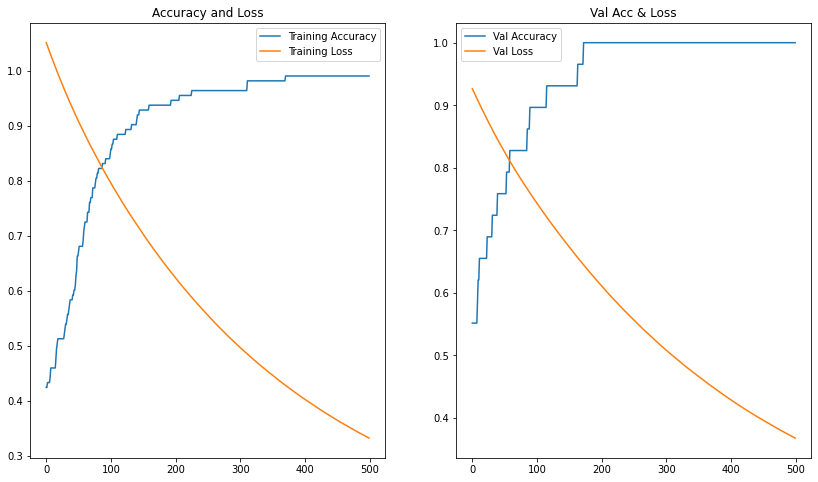

In [322]:
# Display training details
th = training_history
train_acc = th.history['accuracy']
train_loss = th.history['loss']
val_acc = th.history['val_accuracy']
val_loss = th.history['val_loss']

ep = range(epochs)

plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)

plt.plot(ep, train_acc, label='Training Accuracy')
plt.plot(ep, train_loss, label='Training Loss')

plt.title('Accuracy and Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(ep, val_acc, label='Val Accuracy')
plt.plot(ep, val_loss, label='Val Loss')
plt.title('Val Acc & Loss')
plt.legend()

In [311]:
training_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [324]:
score = model.evaluate(x_test, y_test)
score_df = pd.Series(score, index=['val_loss', 'accuracy'])
score_df

2/2 [==============================] - 0s 910us/step - loss: 0.3067 - accuracy: 0.9722


val_loss    0.306691
accuracy    0.972222
dtype: float64

In [325]:
y_pred = model.predict(x_test)
y_pred[:5]

array([[0.05828134, 0.12909067, 0.81262803],
       [0.04243565, 0.06150511, 0.8960592 ],
       [0.3037364 , 0.5788331 , 0.11743052],
       [0.56821924, 0.21983705, 0.21194372],
       [0.06953611, 0.7250222 , 0.20544177]], dtype=float32)

In [326]:
y_pred = np.where(y_pred>=0.5, 1, y_pred)
y_pred = np.where(y_pred<0.5, 0, y_pred)

In [327]:
y_pred

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [331]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9444444444444444